## K-Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
data=sns.load_dataset("iris")

In [3]:
data.shape

(150, 5)

<function matplotlib.pyplot.show>

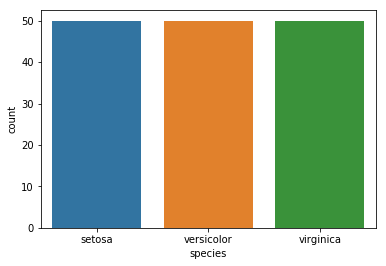

In [4]:
sns.countplot(x=data['species'])
plt.show

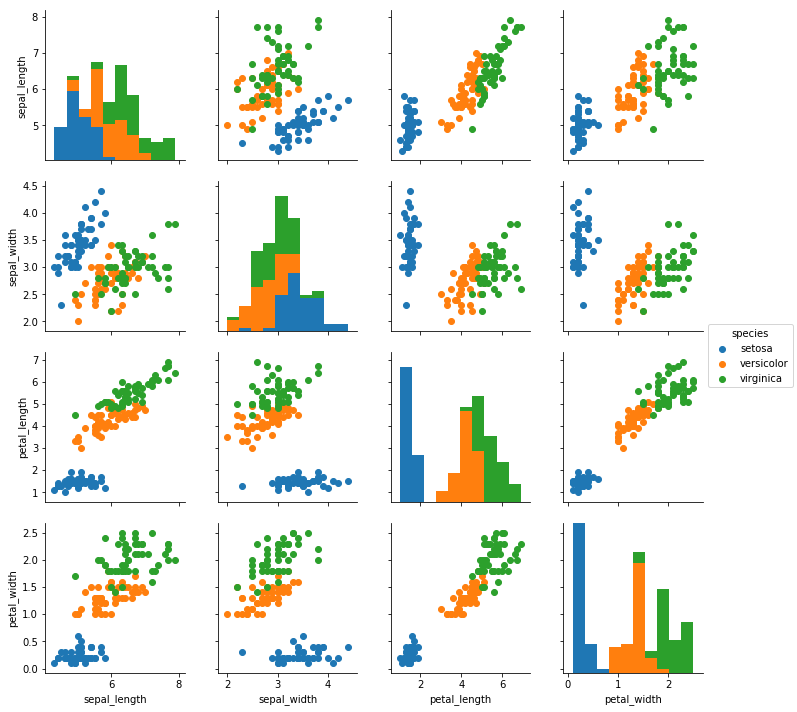

In [5]:
g = sns.PairGrid(data,hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

# Encode Label

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data['Target'] = LabelEncoder().fit_transform(data['species'])

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
y = data['Target']
x = data.drop(['species','Target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

## KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [17]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
knn.score(x_train, y_train)

0.9833333333333333

## Test Set prediction

In [20]:
y_predict = knn.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [24]:
conf_matrix = confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]


In [25]:
species = data['species'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=species, index=species)

In [26]:
conf_matrix_df

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,5,1
virginica,0,0,11


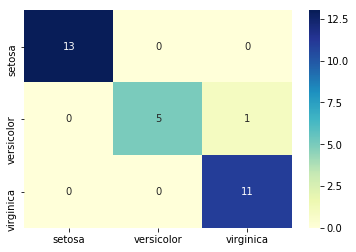

In [27]:
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [29]:
akurasi = accuracy_score(y_test,y_predict)
akurasi

0.9666666666666667